In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Input
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob

from tqdm import tqdm

import seaborn as sn
import pandas as pd

import pylab

### I. **Preprocessing images**  
labels

resize

scale

In [24]:
data = []
labels = [] #only name of species
labels2 = [] #exactly picture name

dir_sample= glob.glob("/content/drive/My Drive/projet_mercantour/picture2/*.jpg")

for imagePath in dir_sample:

  label = os.path.basename(imagePath)
  labels2.append(label)
  label2=label.rsplit('_', 3)[1] #keep only label 
  labels.append(label2)

  image = cv2.imread(imagePath)

  #resize picture
  image = cv2.resize(image,(224,224))#VGG16/19 (224x224x3RGB)

  data.append(image)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
labels2 = np.array(labels2)
#print(labels)

In [25]:
# dictionary of association name of data and the data
all_data = dict(zip(labels2, data)) 
print(len(all_data))
#print(labels2)
#print(all_data['/content/drive/My Drive/projet_mercantour/picture2/maille07_chamois_x1_jourframe120.jpg'])
#print(all_data)

628


### II. **Training-Validation-Testing**

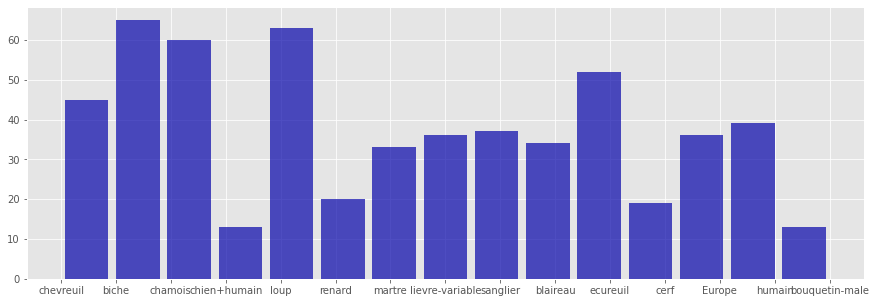

Counter({'biche': 60, 'loup': 52, 'ecureuil': 50, 'chamois': 49, 'chevreuil': 39, 'sanglier': 35, 'humain': 34, 'Europe': 33, 'lievre-variable': 31, 'martre': 30, 'blaireau': 29, 'renard': 18, 'cerf': 18, 'bouquetin-male': 12, 'chien+humain': 12})
Counter({'chamois': 11, 'loup': 11, 'chevreuil': 6, 'lievre-variable': 5, 'humain': 5, 'biche': 5, 'blaireau': 5, 'martre': 3, 'Europe': 3, 'sanglier': 2, 'ecureuil': 2, 'renard': 2, 'bouquetin-male': 1, 'chien+humain': 1, 'cerf': 1})
Counter({'humain': 7, 'chevreuil': 6, 'chamois': 6, 'ecureuil': 6, 'lievre-variable': 5, 'martre': 5, 'Europe': 4, 'biche': 4, 'loup': 4, 'bouquetin-male': 4, 'blaireau': 4, 'renard': 3, 'cerf': 3, 'chien+humain': 1, 'sanglier': 1})


In [27]:
# train 80% / validation 10% /test 10%
# X images and Y labels
# total =628

# Train + Validation (trainfull) 90% and Testing 10%
(trainfullX, testX, trainfullY, testY) = train_test_split(data, labels,test_size=0.1, random_state=42)
#print(len(trainfullY),len(testY)) #565/63
plt.figure(figsize=(15,5))
plt.hist(trainfullY,bins=15, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.show()

# Train 80%  + Validation 10% 
(trainX,valX,trainY,valY) = train_test_split(trainfullX,trainfullY,test_size=0.11,random_state=42)
#print(len(trainY),len(valY)) #502/63

print(Counter(trainY))
print(Counter(valY))
print(Counter(testY))

#print(len(np.unique(trainfullY)))
#print(len(np.unique(trainY)))
#print(len(np.unique(valY)))
#print(len(np.unique(testY)))

# convert the labels from integers to vectors
le = LabelEncoder().fit(trainY)
trainY = np_utils.to_categorical(le.transform(trainY),15)
valY = np_utils.to_categorical(le.transform(valY),15)
testY = np_utils.to_categorical(le.transform(testY),15)

#### Test data only with animals

In [28]:
# Which are the names of pictures in the test data (testX) ?
name_tstx = [] #name of picture testX
tstx = [] #matrix of picture testX in same order of name_tstx
for name in all_data:
  for i in range(0,len(testX)): #len(testX)=63 images in test part
    v = all_data[name]==testX[i] # find equal matrix in order to find name of picture
    if v.all()== True : 
      name_tstx.append(name) #name of picture testX
      tstx.append(testX[i]) #matrix of picture testX in same order of name_tstx

all_tstx = dict(zip(name_tstx[:], tstx))

print(len(testX))
print(len(name_tstx))
print(name_tstx)
print(len(tstx))
#print(all_tstx)

63
63
['maille54_bouquetin-male_x1_jourframe330.jpg', 'maille54_lievre-variable_x1_nuitframe60.jpg', 'maille55_chevreuil_x1_jourframe90.jpg', 'maille55_chevreuil_x1_jourframe120.jpg', 'maille55_chevreuil_x1_jourframe600.jpg', 'maille55_chevreuil_x1_jourframe990.jpg', 'maille55_chien+humain_jourframe420.jpg', 'maille55_lievre-variable_x1_nuitframe270.jpg', 'maille55_lievre-variable_x1_nuitframe300.jpg', 'maille55_lievre-variable_x1_nuitframe330.jpg', 'maille55_loup_x2_nuitframe540.jpg', 'maille55_renard_x1_nuitframe60.jpg', 'maille56_ecureuil_x1_jourframe510.jpg', 'maille56_ecureuil_x1_jourframe1140.jpg', 'maille56_ecureuil_x1_jourframe1170.jpg', 'maille56_ecureuil_x1_jourframe1260.jpg', 'maille56_ecureuil_x1_jourframe1560.jpg', 'maille56_ecureuil_x1_jourframe1650.jpg', 'maille57_martre_x1_nuitframe210.jpg', 'maille57_martre_x1_nuitframe360.jpg', 'maille57_martre_x1_nuitframe690.jpg', 'maille57_martre_x1_nuitframe750.jpg', 'maille57_martre_x1_nuitframe1110.jpg', 'maille86_biche_x4_jourf

In [29]:
# names of pictures filtred manually with animals
labels3=[]
dir_sample2=glob.glob("/content/drive/My Drive/projet_mercantour/sample/one_many_species(name_files)/*.jpg")
for imagePath in dir_sample2:
  label = os.path.basename(imagePath)
  labels3.append(label)

print(labels3)
print(len(labels3))

['maille86_humain_x2_jourframe210.jpg', 'maille86_humain_x2_jourframe240.jpg', 'maille86_humain_x2_jourframe300.jpg', 'maille86_humain_x2_jourframe270.jpg', 'maille86_humain_x2_jourframe330.jpg', 'maille86_humain_x2_jourframe420.jpg', 'maille86_humain_x2_jourframe360.jpg', 'maille86_humain_x2_jourframe390.jpg', 'maille86_humain_x2_jourframe570.jpg', 'maille86_humain_x2_jourframe480.jpg', 'maille86_humain_x2_jourframe510.jpg', 'maille86_humain_x2_jourframe450.jpg', 'maille86_humain_x2_jourframe540.jpg', 'maille86_humain_x2_jourframe630.jpg', 'maille86_humain_x2_jourframe690.jpg', 'maille86_humain_x2_jourframe600.jpg', 'maille86_humain_x2_jourframe660.jpg', 'maille86_humain_x2_jourframe810.jpg', 'maille86_humain_x2_jourframe720.jpg', 'maille86_humain_x2_jourframe780.jpg', 'maille86_humain_x2_jourframe750.jpg', 'maille86_humain_x2_jourframe900.jpg', 'maille86_humain_x2_jourframe870.jpg', 'maille86_humain_x2_jourframe840.jpg', 'maille86_humain_x2_jourframe930.jpg', 'maille86_humain_x2_jour

In [30]:
# Keep only pictures with animals in tstx
name_tstx_animal = []
tstx_animal = []
for names in all_tstx:
  for j in range(0,len(labels3)):
    if names == labels3[j]:
      name_tstx_animal.append(names)
      tstx_animal.append(all_tstx[names])
print(name_tstx_animal)
print(len(name_tstx_animal)) # 46 picture of 63 contained only animals
#print(tstx_animal)
tstx_animal = np.array(tstx_animal)

['maille54_bouquetin-male_x1_jourframe330.jpg', 'maille54_lievre-variable_x1_nuitframe60.jpg', 'maille55_chevreuil_x1_jourframe90.jpg', 'maille55_chevreuil_x1_jourframe120.jpg', 'maille55_chevreuil_x1_jourframe600.jpg', 'maille55_chevreuil_x1_jourframe990.jpg', 'maille55_chien+humain_jourframe420.jpg', 'maille55_lievre-variable_x1_nuitframe270.jpg', 'maille55_lievre-variable_x1_nuitframe300.jpg', 'maille55_lievre-variable_x1_nuitframe330.jpg', 'maille55_loup_x2_nuitframe540.jpg', 'maille55_renard_x1_nuitframe60.jpg', 'maille57_martre_x1_nuitframe210.jpg', 'maille86_biche_x4_jourframe600.jpg', 'maille86_biche_x4_jourframe660.jpg', 'maille86_biche_x4_jourframe720.jpg', 'maille86_biche_x4_jourframe1380.jpg', 'maille86_blaireau_x1_nuitframe390.jpg', 'maille86_blaireau_x1_nuitframe420.jpg', 'maille86_blaireau_x1_nuitframe810.jpg', 'maille86_cerf_x2_jourframe180.jpg', 'maille86_cerf_x2_jourframe210.jpg', 'maille86_cerf_x2_jourframe1050.jpg', 'maille86_humain_x2_jourframe90.jpg', 'maille86_hu

In [31]:
#labels of tstx_animal : tsty_animal
tsty_animal=[]
for nom in name_tstx_animal:
  name_tstx_animal2=nom.rsplit('_', 3)[1]
  tsty_animal.append(name_tstx_animal2)
tsty_animal = np.array(tsty_animal)
print(Counter(tsty_animal))
tsty_animal = np_utils.to_categorical(le.transform(tsty_animal),15)
#print(tsty_animal)

Counter({'humain': 7, 'chevreuil': 6, 'chamois': 6, 'lievre-variable': 5, 'bouquetin-male': 4, 'biche': 4, 'renard': 3, 'blaireau': 3, 'cerf': 3, 'Europe': 2, 'chien+humain': 1, 'loup': 1, 'martre': 1})


####**Show pictures**

TrainX

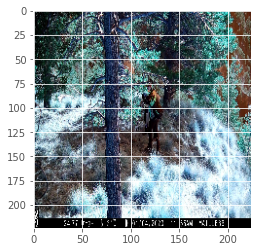

In [32]:
# show picture
plt.imshow(trainX[0])
plt.show()

TestX (not filtered with animals) : 63 pictures

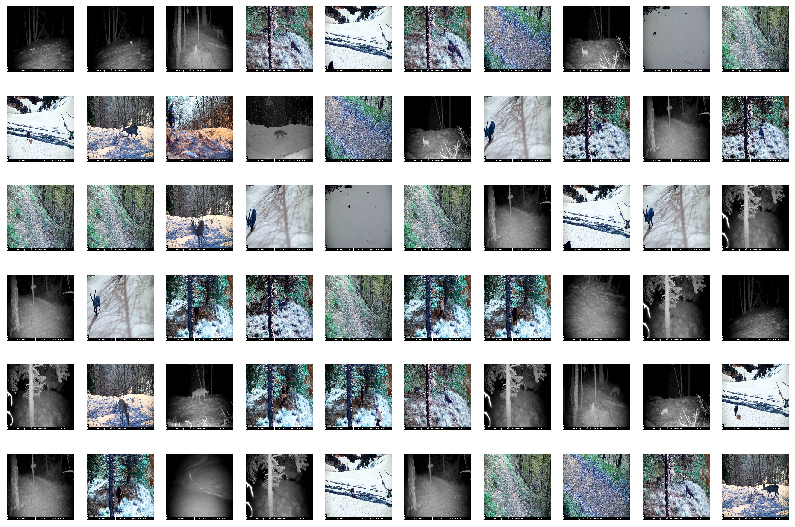

In [33]:
# show multiple pictures
n_rows = 6
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(testX[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.show()

tstx_animal (filtered with animals) : 46 pictures

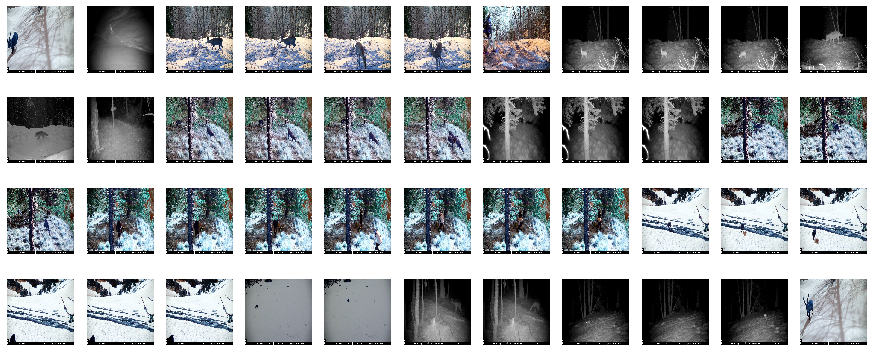

In [34]:
# show multiple pictures
n_rows = 4
n_cols = 11
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(tstx_animal[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.show()

## **III.VGG16**

###**A. Transfer learning**

In [40]:
# load model without output layer
VGGmodel16 = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
VGGmodel16.summary()
#include_top = True : les dernières couches du CNN sont conservées. 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [41]:
# initialize the head model that will be placed on top of the base
headModel = VGGmodel16.output
headModel = Flatten()(headModel) 
# and add a fully-connected layer
headModel = Dense(1024, activation='relu')(headModel)
# finally, the softmax layer for predictions
headModel = Dense(len(np.unique(labels)), activation='softmax')(headModel)

# global network
model16 = Model(inputs=VGGmodel16.input, outputs=headModel)
model16.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [42]:
print(len(VGGmodel16.layers)) #19
print(len(model16.layers)) #22

19
22


In [43]:
# train on last layers
for layer in model16.layers[:19]:
   layer.trainable = False
for layer in model16.layers[19:]:
   layer.trainable = True

# Compile the model
model16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

###**B.Training/ Validation model**

In [ ]:
# train the network
#print("[INFO] training network...")
#H = model16.fit(trainX, trainY, validation_data=(valX,valY),epochs=10)

In [44]:
# we define a callback function that will control if the accuracy 
# on the validation set (a part of train set) is not changing with a patience of 4 iterations
# If the last accuracy value is not the best one, we still keep the last results
ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

H2 = model16.fit(trainX, trainY, validation_data=(valX,valY),epochs=100, callbacks=[ourCallback])

Epoch 1/100
16/16 [==============================] - 5s 315ms/step - loss: 1.0159 - accuracy: 0.7191 - val_loss: 0.2186 - val_accuracy: 0.9365
Epoch 2/100
16/16 [==============================] - 2s 146ms/step - loss: 0.1349 - accuracy: 0.9462 - val_loss: 0.0681 - val_accuracy: 1.0000
Epoch 3/100
16/16 [==============================] - 2s 148ms/step - loss: 0.0589 - accuracy: 0.9841 - val_loss: 0.0506 - val_accuracy: 0.9841
Epoch 4/100
16/16 [==============================] - 2s 149ms/step - loss: 0.0382 - accuracy: 0.9900 - val_loss: 0.0442 - val_accuracy: 0.9841
Epoch 5/100
16/16 [==============================] - 2s 149ms/step - loss: 0.0232 - accuracy: 0.9960 - val_loss: 0.0280 - val_accuracy: 0.9841
Epoch 6/100
16/16 [==============================] - 2s 149ms/step - loss: 0.0217 - accuracy: 0.9920 - val_loss: 0.0288 - val_accuracy: 0.9841


###C. Evaluate model

####Loss function

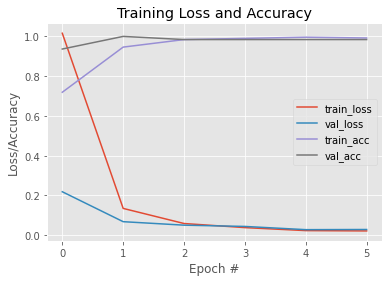

In [45]:
# Loss function 

# plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 6), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), H2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), H2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 6), H2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#### Classification report

In [46]:
names=le.classes_
namesvalY=names

# evaluate the network
print("[INFO] evaluating network...")
pred = model16.predict(valX)
print(classification_report(valY.argmax(axis=1),pred.argmax(axis=1),target_names=namesvalY))

[INFO] evaluating network...
                 precision    recall  f1-score   support

         Europe       0.75      1.00      0.86         3
          biche       1.00      1.00      1.00         5
       blaireau       1.00      1.00      1.00         5
 bouquetin-male       1.00      1.00      1.00         1
           cerf       1.00      1.00      1.00         1
        chamois       1.00      1.00      1.00        11
      chevreuil       1.00      1.00      1.00         6
   chien+humain       1.00      1.00      1.00         1
       ecureuil       1.00      1.00      1.00         2
         humain       1.00      1.00      1.00         5
lievre-variable       1.00      0.80      0.89         5
           loup       1.00      1.00      1.00        11
         martre       1.00      1.00      1.00         3
         renard       1.00      1.00      1.00         2
       sanglier       1.00      1.00      1.00         2

       accuracy                           0.98        63


####Confusion matrix

In [47]:
CM = confusion_matrix(valY.argmax(axis=1),pred.argmax(axis=1))
print(CM)

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]


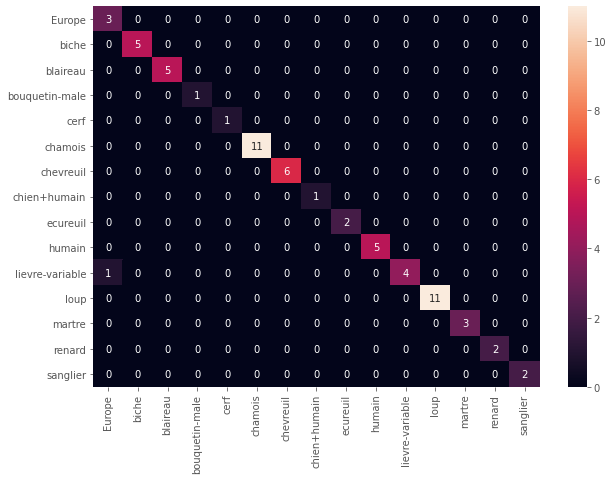

In [48]:
#nicer display:
cm = pd.DataFrame(CM, index = [i for i in namesvalY],
                  columns = [i for i in namesvalY])
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

#### Evaluate on test data

In [49]:
score = model16.evaluate(tstx_animal,tsty_animal)
print("%s: %.2f%%" % (model16.metrics_names[1], score[1]*100))

2/2 [==============================] - 1s 432ms/step - loss: 0.0382 - accuracy: 0.9783
accuracy: 97.83%


In [50]:
predictions = model16.predict(tstx_animal)
predictions_prob = np.argmax(predictions, axis = 1)
predictions_names = names[predictions_prob]
print(predictions_names[:10])

['bouquetin-male' 'lievre-variable' 'chevreuil' 'chevreuil' 'chevreuil'
 'chevreuil' 'chien+humain' 'lievre-variable' 'lievre-variable'
 'lievre-variable']


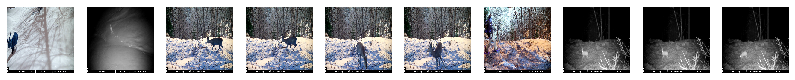

In [51]:
# show multiple pictures
n_rows = 1
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(tstx_animal[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.show()

# IV. Repeat VGG16 X20

#### testX : with animal or not

In [ ]:
my_dict = {}
score_eval = {}

for i in range(1,21):
  
  # train 80% / validation 10% /test 10%
  # X images and Y labels

  # Train + Validation (trainfull) 90% and Testing 10%
  (trainfullX, testX, trainfullY, testY) = train_test_split(data, labels,test_size=0.1)

  # Train 80% + Validation 10%
  (trainX,valX,trainY,valY) = train_test_split(trainfullX,trainfullY,test_size=0.11)

  # convert the labels from integers to vectors
  le = LabelEncoder().fit(trainY)
  trainY = np_utils.to_categorical(le.transform(trainY),15)
  valY = np_utils.to_categorical(le.transform(valY),15)
  testY = np_utils.to_categorical(le.transform(testY),15)

  # load model without output layer
  VGGmodel16 = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

  # initialize the head model that will be placed on top of the base
  headModel = VGGmodel16.output
  headModel = Flatten()(headModel) 
  # and add a fully-connected layer
  headModel = Dense(1024, activation='relu')(headModel)
  # finally, the softmax layer for predictions
  headModel = Dense(len(np.unique(labels)), activation='softmax')(headModel)

  # global network
  model16 = Model(inputs=VGGmodel16.input, outputs=headModel)

  # train on last layers
  for layer in model16.layers[:19]:
    layer.trainable = False
  for layer in model16.layers[19:]:
    layer.trainable = True

  # Compile the model
  model16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

  ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

  H = model16.fit(trainX, trainY, validation_data=(valX,valY),epochs=100, callbacks=[ourCallback])

  my_dict["H"+str(i)] = H

  score = model16.evaluate(testX,testY)

  score_eval["score"+str(i)] = score

Epoch 1/100
16/16 [==============================] - 4s 277ms/step - loss: 0.9382 - accuracy: 0.7530 - val_loss: 0.1695 - val_accuracy: 0.9683
Epoch 2/100
16/16 [==============================] - 2s 124ms/step - loss: 0.1163 - accuracy: 0.9542 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 3/100
16/16 [==============================] - 2s 125ms/step - loss: 0.0472 - accuracy: 0.9821 - val_loss: 0.0359 - val_accuracy: 1.0000
Epoch 4/100
16/16 [==============================] - 2s 125ms/step - loss: 0.0280 - accuracy: 0.9940 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 5/100
16/16 [==============================] - 2s 126ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 1/100
16/16 [==============================] - 2s 137ms/step - loss: 0.8893 - accuracy: 0.7749 - val_loss: 0.1039 - val_accuracy: 0.9841
Epoch 2/100
16/16 [=========================

In [ ]:
loss = []
accuracy = []
val_loss = []
val_accuracy = []
score1 = []

for i in range(1,21):

  loss0=  my_dict["H"+str(i)].history["loss"][-1]
  loss.append(loss0)

  accuracy0=  my_dict["H"+str(i)].history["accuracy"][-1]
  accuracy.append(accuracy0)

  val_loss0=  my_dict["H"+str(i)].history["val_loss"][-1]
  val_loss.append(val_loss0)
  
  val_accuracy0=  my_dict["H"+str(i)].history["val_accuracy"][-1]
  val_accuracy.append(val_accuracy0)

  score0=  score_eval["score"+str(i)][1]*100
  score1.append(score0)
  
  #print(my_dict["H"+str(i)].history["loss"][-1])
  #print(my_dict["H"+str(i)].history["accuracy"][-1])
  #print(my_dict["H"+str(i)].history["val_loss"][-1])
  #print(my_dict["H"+str(i)].history["val_accuracy"][-1])
  #print(score_eval["score"+str(i)][1]*100)

print(loss)
print(accuracy)
print(val_loss)
print(val_accuracy)
print(score1)

[0.015217809937894344, 0.038627397269010544, 0.00877867266535759, 0.03852352872490883, 0.01360141672194004, 0.00696476548910141, 0.016904126852750778, 0.030793413519859314, 0.022779062390327454, 0.023879632353782654, 0.012021545320749283, 0.06273912638425827, 0.021487336605787277, 0.036156974732875824, 0.01170369889587164, 0.01391672994941473, 0.02800309658050537, 0.013104590587317944, 0.01589025929570198, 0.01669308729469776]
[1.0, 0.9840637445449829, 1.0, 0.9880478382110596, 0.9980079531669617, 0.9980079531669617, 0.9960159659385681, 0.9900398254394531, 0.9920318722724915, 0.9920318722724915, 0.9980079531669617, 0.980079710483551, 0.9940239191055298, 0.9920318722724915, 0.9980079531669617, 0.9980079531669617, 0.9860557913780212, 0.9960159659385681, 0.9980079531669617, 0.9980079531669617]
[0.014899560250341892, 0.043344177305698395, 0.007002772763371468, 0.14859206974506378, 0.034604512155056, 0.012582098133862019, 0.010010020807385445, 0.005800515413284302, 0.0035723622422665358, 0.0

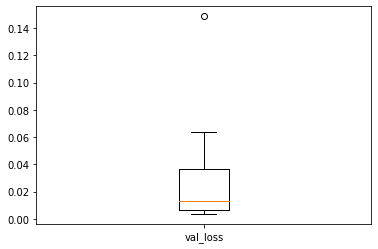

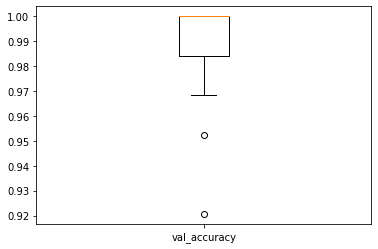

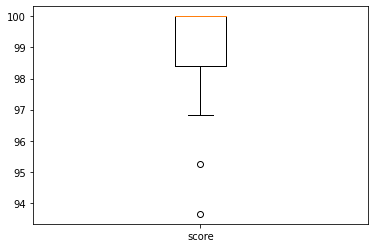

In [ ]:
# box plot "Loss"

BoxName1 = ['val_loss']
databoxplot1 = [val_loss]
plt.boxplot(databoxplot1)
pylab.xticks([1], BoxName1)
plt.show()

# box plot "accuracy"

BoxName2 = ['val_accuracy']
databoxplot2 = [val_accuracy]
plt.boxplot(databoxplot2)
pylab.xticks([1], BoxName2)
plt.show()

# box plot "score"

BoxName3 = ['score']
databoxplot3 = [score1]
plt.boxplot(databoxplot3)
pylab.xticks([1], BoxName3)
plt.show()

#### tstx_animal : with animal 

In [ ]:
my_dict2 = {}
score_eval2 = {}

for k in range(1,21):
  
  # train 80% / validation 10% /test 10%
  # X images and Y labels

  # Train + Validation (trainfull) 90% and Testing 10%
  (trainfullX, testX, trainfullY, testY) = train_test_split(data, labels,test_size=0.1)

  # Train 80% + Validation 10% 
  (trainX,valX,trainY,valY) = train_test_split(trainfullX,trainfullY,test_size=0.11)

  # convert the labels from integers to vectors
  le = LabelEncoder().fit(trainY)
  trainY = np_utils.to_categorical(le.transform(trainY),15)
  valY = np_utils.to_categorical(le.transform(valY),15)
  testY = np_utils.to_categorical(le.transform(testY),15)

  # Which are the names of pictures in the test data (testX) ?
  name_tstx = [] #name of picture testX
  tstx = [] #matrix of picture testX in same order of name_tstx
  for name in all_data:
    for i in range(0,len(testX)): 
      v = all_data[name]==testX[i] 
      if v.all()== True : 
        name_tstx.append(name) #name of picture testX
        tstx.append(testX[i]) #matrix of picture testX in same order of name_tstx

  all_tstx = dict(zip(name_tstx[:], tstx))

  # names of pictures filtred manually with animals
  labels3=[]
  dir_sample2=glob.glob("/content/drive/My Drive/projet_mercantour/sample/one_many_species(name_files)/*.jpg")
  for imagePath in dir_sample2:
    label = os.path.basename(imagePath)
    labels3.append(label)

  # Keep only pictures with animals in tstx
  name_tstx_animal = []
  tstx_animal = []
  for names in all_tstx:
    for j in range(0,len(labels3)):
      if names == labels3[j]:
        name_tstx_animal.append(names)
        tstx_animal.append(all_tstx[names])
  
  tstx_animal = np.array(tstx_animal)

  #labels of tstx_animal : tsty_animal
  tsty_animal=[]
  for nom in name_tstx_animal:
    name_tstx_animal2=nom.rsplit('_', 3)[1]
    tsty_animal.append(name_tstx_animal2)
  
  tsty_animal = np.array(tsty_animal)
  tsty_animal = np_utils.to_categorical(le.transform(tsty_animal),15)

# load model without output layer
  VGGmodel16 = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

  # initialize the head model that will be placed on top of the base
  headModel = VGGmodel16.output
  headModel = Flatten()(headModel) 
  # and add a fully-connected layer
  headModel = Dense(1024, activation='relu')(headModel)
  # finally, the softmax layer for predictions
  headModel = Dense(len(np.unique(labels)), activation='softmax')(headModel)

  # global network
  model16 = Model(inputs=VGGmodel16.input, outputs=headModel)

  # train on last layers
  for layer in model16.layers[:19]:
    layer.trainable = False
  for layer in model16.layers[19:]:
    layer.trainable = True

  # Compile the model
  model16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

  ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
  
  H = model16.fit(trainX, trainY, validation_data=(valX,valY),epochs=100, callbacks=[ourCallback])

  my_dict2["H"+str(k)] = H

  score = model16.evaluate(tstx_animal,tsty_animal)

  score_eval2["score"+str(k)] = score

In [ ]:
loss = []
accuracy = []
val_loss = []
val_accuracy = []
score1 = []

for i in range(1,21):

  loss0=  my_dict2["H"+str(i)].history["loss"][-1]
  loss.append(loss0)

  accuracy0=  my_dict2["H"+str(i)].history["accuracy"][-1]
  accuracy.append(accuracy0)

  val_loss0=  my_dict2["H"+str(i)].history["val_loss"][-1]
  val_loss.append(val_loss0)
  
  val_accuracy0=  my_dict2["H"+str(i)].history["val_accuracy"][-1]
  val_accuracy.append(val_accuracy0)

  score0=  score_eval2["score"+str(i)][1]*100
  score1.append(score0)

print(loss)
print(accuracy)
print(val_loss)
print(val_accuracy)
print(score1)

[0.021649125963449478, 0.020162755623459816, 0.01480108592659235, 0.008310919627547264, 0.018612142652273178, 0.00987253151834011, 0.014187355525791645, 0.008616454899311066, 0.029712194576859474, 0.015918239951133728, 0.026040025055408478, 0.014876043424010277, 0.03033609129488468, 0.01539506297558546, 0.0192800834774971, 0.05695480480790138, 0.015037290751934052, 0.02213495969772339, 0.014262567274272442, 0.017249874770641327]
[0.9980079531669617, 0.9940239191055298, 1.0, 0.9980079531669617, 1.0, 1.0, 0.9940239191055298, 1.0, 0.9860557913780212, 0.9920318722724915, 0.9880478382110596, 0.9940239191055298, 0.9840637445449829, 0.9940239191055298, 0.9960159659385681, 0.9780876636505127, 0.9940239191055298, 0.9920318722724915, 0.9960159659385681, 0.9960159659385681]
[0.012082899920642376, 0.013399074785411358, 0.006639848463237286, 0.014488817192614079, 0.004941110499203205, 0.015646060928702354, 0.028353868052363396, 0.020871052518486977, 0.101175956428051, 0.019251631572842598, 0.007569

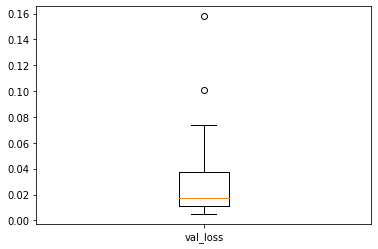

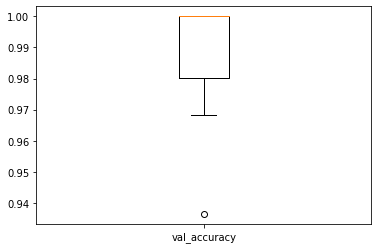

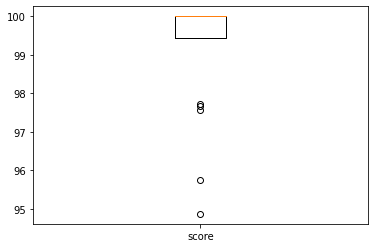

In [ ]:
# box plot "Loss"

BoxName1 = ['val_loss']
databoxplot1 = [val_loss]
plt.boxplot(databoxplot1)
pylab.xticks([1], BoxName1)
plt.show()

# box plot "accuracy"

BoxName2 = ['val_accuracy']
databoxplot2 = [val_accuracy]
plt.boxplot(databoxplot2)
pylab.xticks([1], BoxName2)
plt.show()

# box plot "score"

BoxName3 = ['score']
databoxplot3 = [score1]
plt.boxplot(databoxplot3)
pylab.xticks([1], BoxName3)
plt.show()

#### Test with same images of same videos in same part of Train-Validation-Test

In [5]:
testX = []
testY = []
valX=[]
valY=[]
trainX=[]
trainY=[]

for name in all_data:

  a = name.rsplit("_",1)[0]

  if a == "maille41_loup_x1" or a =="maille39_lievre-variable_x1" :
    testX.append(all_data[name])
    testY.append(name.rsplit('_', 3)[1])
    
  elif a == "maille55_renard_x1" or a =="maille55_loup_x2" or a =="maille55_chien+humain" or a =="maille54_lievre-variable_x1" or a =="maille07_chamois_x1" or a =="maille87_biche_x1" or a =="maille41_lievre-d_Europe_x1" or a =="maille24_chevreuil_x1":
    valX.append(all_data[name])
    valY.append(name.rsplit('_', 3)[1])
  
  else :
    trainX.append(all_data[name])
    trainY.append(name.rsplit('_', 3)[1])

# rename chien+humain --> humain just for this script
valy=[]
for name2 in valY:
  if name2=="chien+humain":
    nm="humain"
    valy.append(nm)
  else:
    valy.append(name2)

testX = np.array(testX) #in test part there are only images which contained animals
valX = np.array(valX)
trainX = np.array(trainX)
testY = np.array(testY)
valy = np.array(valy)
trainY = np.array(trainY)

print(len(testX))
print(len(valX))
print(len(trainX))

# convert the labels from integers to vectors
le = LabelEncoder().fit(trainY)
trainY = np_utils.to_categorical(le.transform(trainY),15)
valY = np_utils.to_categorical(le.transform(valy),15)
testY = np_utils.to_categorical(le.transform(testY),15)

11
131
486


In [ ]:
my_dict2 = {}
score_eval2 = {}

for k in range(1,21):
  
# load model without output layer
  VGGmodel16 = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

  # initialize the head model that will be placed on top of the base
  headModel = VGGmodel16.output
  headModel = Flatten()(headModel) 
  # and add a fully-connected layer
  headModel = Dense(1024, activation='relu')(headModel)
  # finally, the softmax layer for predictions
  headModel = Dense(len(np.unique(labels)), activation='softmax')(headModel)

  # global network
  model16 = Model(inputs=VGGmodel16.input, outputs=headModel)

  # train on last layers
  for layer in model16.layers[:19]:
    layer.trainable = False
  for layer in model16.layers[19:]:
    layer.trainable = True

  # Compile the model
  model16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

  ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
  
  H = model16.fit(trainX, trainY, validation_data=(valX,valY),epochs=100, callbacks=[ourCallback])

  my_dict2["H"+str(k)] = H

  score = model16.evaluate(testX,testY)

  score_eval2["score"+str(k)] = score

Epoch 1/100
16/16 [==============================] - 3s 161ms/step - loss: 0.6827 - accuracy: 0.8086 - val_loss: 3.1770 - val_accuracy: 0.3817
Epoch 2/100
16/16 [==============================] - 2s 152ms/step - loss: 0.0542 - accuracy: 0.9794 - val_loss: 3.7565 - val_accuracy: 0.2366
Epoch 3/100
16/16 [==============================] - 2s 151ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 3.7810 - val_accuracy: 0.2443
Epoch 4/100
16/16 [==============================] - 2s 154ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.7717 - val_accuracy: 0.2443
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.4918 - accuracy: 0.0000e+00
Epoch 1/100
16/16 [==============================] - 3s 168ms/step - loss: 0.7424 - accuracy: 0.7881 - val_loss: 2.7780 - val_accuracy: 0.2366
Epoch 2/100
16/16 [==============================] - 3s 160ms/step - loss: 0.0638 - accuracy: 0.9691 - val_loss: 3.0174 - val_accuracy: 0.2366
Epoch 3/100
16/16 [======================

In [ ]:
loss = []
accuracy = []
val_loss = []
val_accuracy = []
score1 = []

for i in range(1,21):

  loss0=  my_dict2["H"+str(i)].history["loss"][-1]
  loss.append(loss0)

  accuracy0=  my_dict2["H"+str(i)].history["accuracy"][-1]
  accuracy.append(accuracy0)

  val_loss0=  my_dict2["H"+str(i)].history["val_loss"][-1]
  val_loss.append(val_loss0)
  
  val_accuracy0=  my_dict2["H"+str(i)].history["val_accuracy"][-1]
  val_accuracy.append(val_accuracy0)

  score0=  score_eval2["score"+str(i)][1]*100
  score1.append(score0)

print(loss)
print(accuracy)
print(val_loss)
print(val_accuracy)
print(score1)

[0.0022083285730332136, 0.005776540841907263, 0.0032189199700951576, 0.0025321755092591047, 0.00468951091170311, 0.003533643437549472, 0.0037176574114710093, 0.00332946190610528, 0.0037896179128438234, 0.004427225794643164, 0.003685635980218649, 0.0028906811494380236, 0.0059813340194523335, 0.005258368793874979, 0.004022539127618074, 0.004048656672239304, 0.002543606096878648, 0.004786094184964895, 0.002430676482617855, 0.003309129271656275]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[3.762881278991699, 3.141728401184082, 3.7205512523651123, 3.495121479034424, 3.375612497329712, 3.5267043113708496, 3.4188473224639893, 3.4575448036193848, 3.6165454387664795, 3.4094629287719727, 4.015193462371826, 3.642313241958618, 3.6342525482177734, 3.8932478427886963, 3.068195343017578, 3.7789194583892822, 3.364978075027466, 3.309854745864868, 3.703038454055786, 4.030202388763428]
[0.2442748099565506, 0.23664122819900513, 0.23664122819900513, 

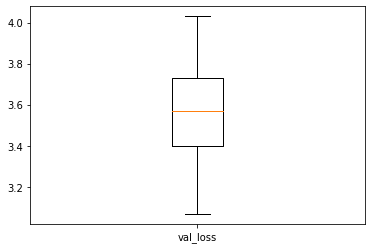

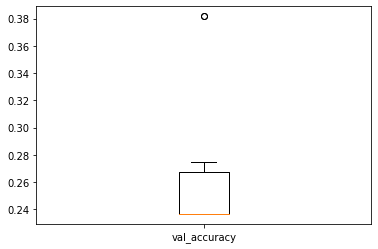

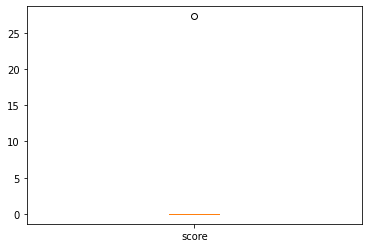

In [ ]:
# box plot "Loss"

BoxName1 = ['val_loss']
databoxplot1 = [val_loss]
plt.boxplot(databoxplot1)
pylab.xticks([1], BoxName1)
plt.show()

# box plot "accuracy"

BoxName2 = ['val_accuracy']
databoxplot2 = [val_accuracy]
plt.boxplot(databoxplot2)
pylab.xticks([1], BoxName2)
plt.show()

# box plot "score"

BoxName3 = ['score']
databoxplot3 = [score1]
plt.boxplot(databoxplot3)
pylab.xticks([1], BoxName3)
plt.show()